# Predicting NBA Player Salaries from Performance Metrics

Why do some basketball players earn more than others? How can we identify under-valued players? This analysis will dive into data on the National Basketball Association's 2018-2019 season and analyze the affects of performance metrics generated by players on their salary. 

Table of Contents: <br>
&emsp; [Data Introduction](#Data_Intro) <br>
&emsp; [Data Preprocessing](#Data_Prep) <br>
&emsp; [Data Visualization](#Data_Viz) <br>
&emsp; [Data Analysis](#Data_An) <br>


In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
nba = pd.read_csv("nbastats2018-2019.csv")

<a id='Data_Intro'></a>
## Data Introduction
The raw dataset consists of 27 columns and 521 rows, each row represents an individual player and each column provides physical and basketball performance metrics to describe the player, such as their average points per game this season. Although the dataset has a very limited number of observations (521 players), the collective dataset represents the entire population of NBA players in the season, as opposed to a sample.

In [4]:
nba.columns

Index(['Name', 'Height', 'Weight', 'Team', 'Age', 'Salary', 'Points', 'Blocks',
       'Steals', 'Assists', 'Rebounds', 'FT%', 'FTA', 'FG3%', 'FG3A', 'FG%',
       'FGA', 'MP', 'G', 'PER', 'OWS', 'DWS', 'WS', 'WS48', 'USG', 'BPM',
       'VORP'],
      dtype='object')

In [5]:
nba.head()

,Name,Height,Weight,Team,Age,Salary,Points,Blocks,Steals,Assists,...,MP,G,PER,OWS,DWS,WS,WS48,USG,BPM,VORP
0,Alex Abrines,78,200,Oklahoma City Thunder,25,5455236,5.3,0.2,0.5,0.6,...,19.0,31,6.3,0.1,0.6,0.6,0.053,12.2,-3.4,-0.2
1,Quincy Acy,79,240,Phoenix Suns,28,213949,1.7,0.4,0.1,0.8,...,12.3,10,2.9,-0.1,0.0,-0.1,-0.022,9.2,-5.9,-0.1
2,Jaylen Adams,74,190,Atlanta Hawks,22,236854,3.2,0.1,0.4,1.9,...,12.6,34,7.6,-0.1,0.2,0.1,0.011,13.5,-4.4,-0.3
3,Steven Adams,84,265,Oklahoma City Thunder,25,24157304,13.9,1.0,1.5,1.6,...,33.4,80,18.5,5.1,4.0,9.1,0.163,16.4,2.7,3.2
4,Bam Adebayo,82,255,Miami Heat,21,2955840,8.9,0.8,0.9,2.2,...,23.3,82,17.9,3.4,3.4,6.8,0.171,15.8,3.0,2.4


In [6]:
nba.describe()

,Height,Weight,Age,Points,Blocks,Steals,Assists,Rebounds,FT%,FTA,...,MP,G,PER,OWS,DWS,WS,WS48,USG,BPM,VORP
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,499.000000,521.000000,...,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,78.971209,217.516315,25.900192,8.737236,0.397889,0.621497,1.948752,3.661804,0.735144,1.819386,...,19.598848,49.988484,13.247025,1.237236,1.155278,2.393858,0.079063,18.757582,-1.770058,0.577735
std,3.299932,23.522089,4.208236,6.085559,0.405794,0.412589,1.776774,2.527316,0.145222,1.641701,...,8.988803,25.626606,7.058072,1.854837,1.106543,2.742634,0.115215,5.593436,4.942094,1.330516
min,69.000000,166.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.700000,1.000000,-38.100000,-2.800000,-0.500000,-1.700000,-0.946000,0.000000,-52.300000,-2.200000
25%,77.000000,200.000000,23.000000,4.200000,0.100000,0.300000,0.800000,1.900000,0.675000,0.700000,...,12.600000,29.000000,9.800000,0.000000,0.300000,0.300000,0.039000,15.000000,-3.700000,-0.100000
50%,79.000000,215.000000,25.000000,7.100000,0.300000,0.500000,1.300000,3.100000,0.759000,1.300000,...,19.300000,57.000000,12.800000,0.500000,0.900000,1.500000,0.085000,17.800000,-1.500000,0.100000
75%,82.000000,235.000000,29.000000,11.800000,0.500000,0.900000,2.500000,4.700000,0.822000,2.400000,...,27.200000,73.000000,16.600000,1.900000,1.700000,3.500000,0.123000,22.100000,0.500000,0.800000
max,87.000000,290.000000,42.000000,36.100000,2.700000,2.200000,10.700000,15.600000,1.000000,11.000000,...,36.900000,82.000000,80.400000,11.400000,5.900000,15.200000,1.261000,47.200000,14.900000,9.900000


<a id='Data_Prep'></a>
## Data Preprocessing

View the variable counts to detect NA values

In [7]:
nba.count()

Name        521
Height      521
Weight      521
Team        470
Age         521
Salary      521
Points      521
Blocks      521
Steals      521
Assists     521
Rebounds    521
FT%         499
FTA         521
FG3%        489
FG3A        521
FG%         519
FGA         521
MP          521
G           521
PER         521
OWS         521
DWS         521
WS          521
WS48        521
USG         521
BPM         521
VORP        521
dtype: int64

We observe that the 'Team', 'FT%', 'FG3%', and 'FG%' variables have smaller value counts than the other variables. This indicates the presence of NA values in these variables. We next observe the datatypes.

In [8]:
nba.dtypes

Name         object
Height        int64
Weight        int64
Team         object
Age           int64
Salary       object
Points      float64
Blocks      float64
Steals      float64
Assists     float64
Rebounds    float64
FT%         float64
FTA         float64
FG3%        float64
FG3A        float64
FG%         float64
FGA         float64
MP          float64
G             int64
PER         float64
OWS         float64
DWS         float64
WS          float64
WS48        float64
USG         float64
BPM         float64
VORP        float64
dtype: object

We notice that the Salary variable is of type 'object'. This does not support our intuition since salaries should be numerical, indicating their may be a problem with the variable. We will take a closer look at the variable value counts:

In [9]:
nba.loc[:,'Salary'].value_counts()

-           51
1378242     20
838464      15
1544951     15
2393887     13
            ..
108953       1
19169800     1
1200000      1
3499800      1
3208630      1
Name: Salary, Length: 333, dtype: int64

The most frequent salary value is a dashed line: '-'. This is not a numerical value and is likely the reason our variable is of the 'object' type. We observe the observations have a dashed line for salary:

In [10]:
nba.loc[nba['Salary']=='-'].head()

,Name,Height,Weight,Team,Age,Salary,Points,Blocks,Steals,Assists,...,MP,G,PER,OWS,DWS,WS,WS48,USG,BPM,VORP
5,Deng Adel,79,200,NaN,21,-,1.7,0.2,0.1,0.3,...,10.2,19,2.7,-0.2,0.0,-0.2,-0.054,9.9,-7.3,-0.3
7,Rawle Alkins,77,225,NaN,21,-,3.7,0.0,0.1,1.3,...,12.0,10,8.1,-0.1,0.0,-0.1,-0.042,19.0,-6.5,-0.1
10,Kadeem Allen,75,192,NaN,26,-,9.9,0.2,0.8,4.0,...,21.9,19,16.2,0.7,0.2,1.0,0.111,19.6,-1.1,0.1
16,Kostas Antetokounmpo,82,200,NaN,21,-,1.0,0.0,1.0,0.0,...,5.5,2,-0.9,-0.1,0.0,-0.1,-0.247,22.5,-13.3,0.0
52,Jaron Blossomgame,79,220,NaN,25,-,4.2,0.3,0.3,0.5,...,16.3,27,10.2,0.2,0.1,0.3,0.030,12.2,-4.5,-0.3


The same players with unknown salaries also have unknown team values. This likely indicates that these players were cut from their teams in the middle of the season. We will remove these players from our dataset since they do not provide a salary value to predict.

In [11]:
nba = nba[nba['Salary']!='-']
nba['Salary'] = nba.loc[:,'Salary'].astype('int64')
nba['Salary'].value_counts()

1378242     20
838464      15
1544951     15
2393887     13
1349383      6
            ..
9607500      1
7945000      1
1487694      1
11571429     1
24000000     1
Name: Salary, Length: 332, dtype: int64

In [12]:
nba.count()

Name        470
Height      470
Weight      470
Team        470
Age         470
Salary      470
Points      470
Blocks      470
Steals      470
Assists     470
Rebounds    470
FT%         456
FTA         470
FG3%        445
FG3A        470
FG%         469
FGA         470
MP          470
G           470
PER         470
OWS         470
DWS         470
WS          470
WS48        470
USG         470
BPM         470
VORP        470
dtype: int64

We observe that removing '-' salary values decreases the total number of observations to 470, and removes all NA values for the 'Team' variable. Next we will deal with the NA values for 'FT%', 'FG3%', and 'FG%'

In [13]:
nba.loc[nba['FT%'].isna(),['Name','Points','FT%','FTA']].head()

,Name,Points,FT%,FTA
14,Ike Anigbogu,0.0,NaN,0.0
44,Dairis Bertans,2.8,NaN,0.0
100,Chris Chiozza,0.9,NaN,0.0
155,Jawun Evans,0.8,NaN,0.0
235,Isaac Humphries,3.0,NaN,0.0


We observe that in every instance where 'FT%' equals NA, the number of free throws attempted was also 0. 
Therefore, these percentages were calculated through division by 0, resulting in NA values. This pattern holds
true for the 'FG3%', and 'FG%' variables as well. For our analysis, we will set these values to 0, or 0%.

In [14]:
nba[['FT%', 'FG%', 'FG3%']] = nba[['FT%', 'FG%', 'FG3%']].fillna(0,)
nba.isna().values.any()

False

When checking the dataframe again, we observe that all columns are clean of NA values. We also observe below that all columns have the corrent number of observations and all datatypes are correct.

In [15]:
nba.count()

Name        470
Height      470
Weight      470
Team        470
Age         470
Salary      470
Points      470
Blocks      470
Steals      470
Assists     470
Rebounds    470
FT%         470
FTA         470
FG3%        470
FG3A        470
FG%         470
FGA         470
MP          470
G           470
PER         470
OWS         470
DWS         470
WS          470
WS48        470
USG         470
BPM         470
VORP        470
dtype: int64

In [16]:
nba.dtypes

Name         object
Height        int64
Weight        int64
Team         object
Age           int64
Salary        int64
Points      float64
Blocks      float64
Steals      float64
Assists     float64
Rebounds    float64
FT%         float64
FTA         float64
FG3%        float64
FG3A        float64
FG%         float64
FGA         float64
MP          float64
G             int64
PER         float64
OWS         float64
DWS         float64
WS          float64
WS48        float64
USG         float64
BPM         float64
VORP        float64
dtype: object

We are now ready to perform an EDA on the dataset.

<a id='Data_Viz'></a>
## Data Visualization

We begin with a correlation matrix of the most relevant variables.

<AxesSubplot:>

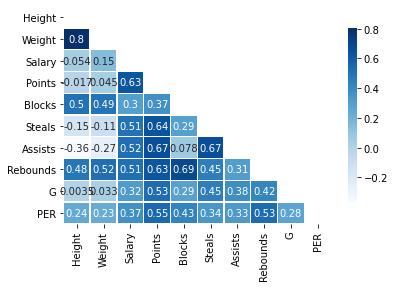

In [17]:
corrs = nba.iloc[:,[1,2,5,6,7,8,9,10,18,19]].corr()
mask = np.triu(np.ones_like(corrs, dtype=np.bool))
sns.heatmap(corrs, mask = mask, linewidth=0.3, cbar_kws={"shrink": .8}, annot = True, cmap='Blues')

We observe that 'Salary' has a correlation above 0.5 with the variables: 'Points', 'Steals', 'Assists', 'Rebounds'

Next, we will calculate a histogram of the 'Salary' variable to observe its general distribution

Text(0.5, 1.0, 'Salary Histogram')

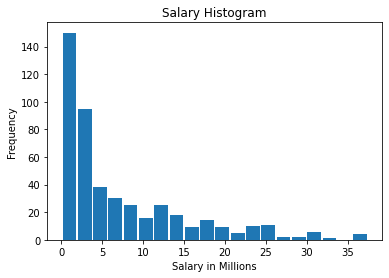

In [18]:
plt.hist(nba['Salary']/1000000, bins = 20, rwidth = .9)
plt.xlabel('Salary in Millions')
plt.ylabel('Frequency')
plt.title('Salary Histogram')

We observe that the variable is distinctly right-skewed. Although most players make less than \\$5 million per year, salaries can even exceed \\$35 million for select players. While we will expect most of our salary predictions to be within the \\$0-\\$5 million range, one of the goals for this analysis will be to identify which factors influence players to obtain higher salaries. It's likely that the path to higher salaries is segmented and that there's no singular performance metric that determines salary, but rather multiple groups of performance combinations which can each indicate higher salaries.

In order to assess this, we'll graphically observe relationships between variables using scatter plots. We first split salary into three groups of equal frequency which represent low, medium, and high salaries.

In [19]:
nba['Sal_Group'] = pd.qcut(nba['Salary'],3, labels = ['Low','Medium','High'])
nba['Sal_Group'].value_counts()

High      157
Low       157
Medium    156
Name: Sal_Group, dtype: int64

We plot 2 scatter plots of different variable pairs below:

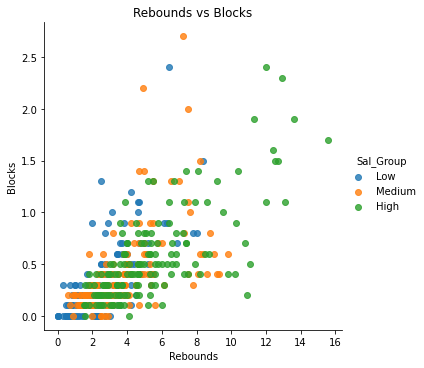

In [20]:
sns.lmplot('Rebounds','Blocks', data = nba, hue = 'Sal_Group', fit_reg = False)
plt.xlabel('Rebounds')
plt.ylabel('Blocks')
plt.title('Rebounds vs Blocks')
plt.show()

Text(0.5, 1.0, 'Points vs Assists')

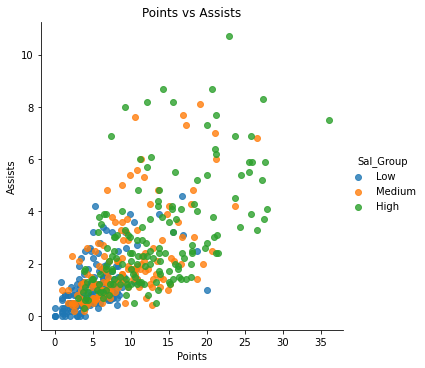

In [21]:
sns.lmplot('Points','Assists', data = nba, hue = 'Sal_Group', fit_reg = False)
plt.xlabel('Points')
plt.ylabel('Assists')
plt.title('Points vs Assists')

While there is overlap in both scatter plots, we still observe a general progression in salary as 'Blocks' and 'Rebounds', and as 'Points' and 'Assists' both simultaneously increase. This supports our hypothesis that there are multiple combinations of variables which may result in higher salaries. We will formally test these hypotheses and make predictions on player salaries in the next section.

<a id='Data_An'></a>
## Data Analysis

Prior to performing any analysis we first prepare our data for prediction, this includes splitting the data into a training, validation, and testing set, and encoding categorical variables. We allocate data to our train, validation, and test sets with a 60-15-25 split respectively.

In [22]:
#Split explanatory and response variables
X = nba.loc[:,nba.columns != 'Salary']
X.drop(columns = 'Name', inplace = True)
X.drop(columns = 'Sal_Group', inplace = True)
y = nba.iloc[:,5]
#Create training and testing sets
#Test set - 25% of data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25,random_state = 733)
#Numically encode categorical variables
le = LabelEncoder()
X_train.loc[:,'Team'] = le.fit_transform(X_train.loc[:,'Team'])
X_test.loc[:,'Team'] = le.transform(X_test.loc[:,'Team'])
#Split training set into training and validation sets
#Train set - 60% of data
#Validation set - 15% of data
X_train, X_validate, y_train, y_validate = train_test_split(X_train,y_train,test_size = .2,random_state = 733)

We begin our analysis with a baseline linear regression model without standardization, regularization or feature selection.

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_validate)

#Create a function that calculates various goodness-of-fit metrics
def fit_metrics(actual, pred):
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mse)
    r_sqr = r2_score(actual, pred)
    print('MSE:',mse,'RMSE:',rmse,'R-Squared:',r_sqr)
fit_metrics(y_validate, preds)

MSE: 35113008614429.98 RMSE: 5925623.057065812 R-Squared: 0.26290916581550305


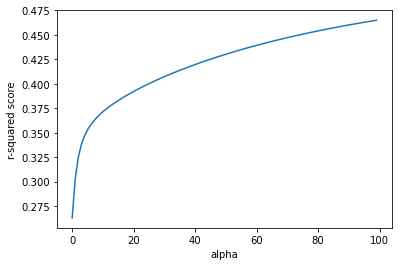

In [24]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_validate = ss.transform(X_validate)
r_sqrs = []
rmses = []
alph = range(100)
for a in alph:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    r_sqrs.append(ridge.score(X_validate, y_validate))
    pred = ridge.predict(X_validate)
    rmses.append(np.sqrt(mean_squared_error(y_validate, pred)))
    
plt.plot(alph, r_sqrs)   
plt.xlabel('alpha')
plt.ylabel('r-squared score')
plt.show()

In [25]:
rcv = RidgeCV(alphas=np.arange(50,70,.1), cv=5)
rcv.fit(X_train, y_train)
rcv.score(X_validate, y_validate)
rcv.alpha_
preds = rcv.predict(X_validate)
fit_metrics(y_validate, preds)

MSE: 26790052416375.723 RMSE: 5175910.781338462 R-Squared: 0.43762432036889853


In [26]:
bag = BaggingRegressor()
params = {'n_estimators':range(50,1000,50), 'max_samples':np.arange(.1,1.1,.1)}
search_bag = RandomizedSearchCV(bag,params,n_jobs=-1,n_iter=20, random_state = 733)
search_bag.fit(X_train, y_train)
#Best parameters:
search_bag.best_params_

{'n_estimators': 750, 'max_samples': 1.0}

In [27]:
bag = BaggingRegressor(n_estimators = 900, max_samples = .8)
bag.fit(X_validate, y_validate)
pred = search_bag.predict(X_validate)
fit_metrics(y_validate, pred)

MSE: 25658536154122.242 RMSE: 5065425.564957227 R-Squared: 0.46137706325675776


In [28]:
rf = RandomForestRegressor()
params = {'max_features':np.arange(.1,1.1,.1),'n_estimators':range(50,1000,50), 'min_samples_leaf': range(1,20)}
search_rf = RandomizedSearchCV(rf,params, n_jobs=-1, n_iter = 20, random_state = 733)
search_rf.fit(X_train, y_train)
#Best parameters:
search_rf.best_params_

{'n_estimators': 550, 'min_samples_leaf': 5, 'max_features': 1.0}

In [29]:
rf = RandomForestRegressor(max_features = .6, n_estimators = 500, min_samples_leaf = 4)
rf.fit(X_train,y_train)
pred = rf.predict(X_validate)
fit_metrics(y_validate, pred)

MSE: 25851143974462.14 RMSE: 5084402.027226225 R-Squared: 0.45733384780564856
